## Try to start a localhost

Ref:
*   https://stackoverflow.com/questions/59741453/is-there-a-general-way-to-run-web-applications-on-google-colab



In [ ]:
!pip install pyngrok


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 397, in resolve
    self._add_to_criteria(self.state.criteria, r, parent=None)
  File "/usr/local/lib/pytho

In [ ]:
!python3 -m http.server 4723


Serving HTTP on 0.0.0.0 port 4723 (http://0.0.0.0:4723/) ...

Keyboard interrupt received, exiting.


In [ ]:
from IPython.display import Javascript

def show_port(port, height=400):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%s)
    fm.width = '95%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, height) ))

In [ ]:
get_ipython().system_raw('python3 -m http.server 9000 &')
show_port(9000)

<IPython.core.display.Javascript object>

# Installation of Prerequisites

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/DAAM/

/content/drive/MyDrive/DAAM


In [ ]:
import os

if(not os.path.exists("/content/drive/MyDrive/DAAM/stanford-corenlp-4.5.4.zip")):
  !wget https://nlp.stanford.edu/software/stanford-corenlp-4.5.4.zip

if(not os.path.exists("/content/drive/MyDrive/DAAM/stanford-corenlp-4.5.4")):
  !unzip stanford-corenlp-4.5.4.zip


In [ ]:
!pip install stanza

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 41.7 MB/s eta 0:00:00


In [ ]:
import stanza
# stanza.install_corenlp(dir='stanford-corenlp-4.5.4')
stanza.install_corenlp(dir='stanford-corenlp-full-2018-10-05')

In [ ]:
!pip install daam==0.1.0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
if(not os.path.exists("/content/drive/MyDrive/DAAM/annotations_trainval2014.zip")):
  !wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip

In [ ]:
if(not os.path.exists('/content/drive/MyDrive/DAAM/coco')):
  !mkdir -p coco
  !mv annotations_* coco
  %cd coco
  !unzip annotations_*

# Generate DAAM Maps

In [ ]:
# %env CORENLP_HOME=stanford-corenlp-4.5.4
# %env CORENLP_HOME='/content/drive/MyDrive/DAAM/stanford-corenlp-full-2018-10-05'
import os
os.environ["CORENLP_HOME"] = '/content/drive/MyDrive/DAAM/stanford-corenlp-full-2018-10-05'

In [ ]:
# stanza.install_corenlp()

INFO:stanza:Installing CoreNLP package into /root/stanza_corenlp


https://github.com/stanfordnlp/stanza/blob/main/demo/Stanza_CoreNLP_Interface.ipynb

In [ ]:
from stanza.server import CoreNLPClient
import stanza

# ref https://stanfordnlp.github.io/stanfordnlp/corenlp_client.html
# stanza.install_corenlp(dir='stanford-corenlp-4.5.4')
client = CoreNLPClient(annotators=['tokenize', 'ssplit', 'pos', 'lemma', 'ner', 'parse', 'depparse','coref'],
                       timeout=150000000,
                       memory='6G',
                       endpoint = 'https://localhost:8100')

INFO:stanza:Writing properties to tmp file: corenlp_server-15128c6dcc1d491a.props


In [ ]:
# get_ipython().system_raw('python3 -m http.server 4723 &')
# show_port(4723)

<IPython.core.display.Javascript object>

In [ ]:
from pathlib import Path
import json

annotations = json.load(Path('/content/drive/MyDrive/DAAM/coco/annotations/captions_train2014.json').open())

In [ ]:
annotations.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [ ]:
import pandas as pd

df = pd.DataFrame(annotations['annotations'])

In [ ]:
%cd '/content/drive/MyDrive/DAAM/results/part_04/'

/content/drive/MyDrive/DAAM/results/part_04


In [ ]:
if (not os.path.exists('/content/drive/MyDrive/DAAM/results/part_04/experiments/visuosyntax')):
  !mkdir -p experiments/visuosyntax

In [ ]:
df = df.sample(3, replace=False)

In [ ]:
import torch

torch.cuda.amp.autocast().__enter__()
torch.set_grad_enabled(False);

In [ ]:
from diffusers import StableDiffusionPipeline
from daam import set_seed, trace

pipe = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-1-base')

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
pipe.to('cuda:0')

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

 33%|███▎      | 1/3 [00:14<00:28, 14.42s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

 67%|██████▋   | 2/3 [00:20<00:09,  9.42s/it]

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:26<00:00,  8.69s/it]


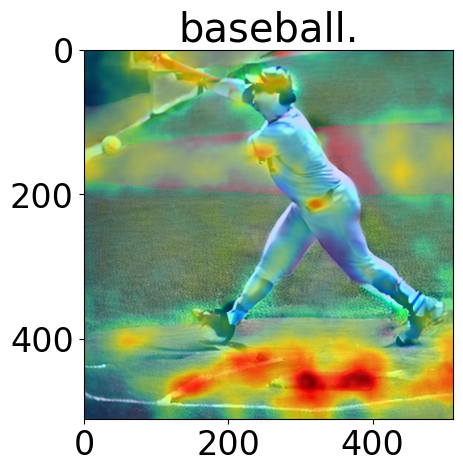

In [ ]:
from tqdm import tqdm

for _, row in tqdm(df.iterrows(), total=len(df)):
    image_id, caption = row.image_id, row.caption
    gen = set_seed(image_id)
    output_folder = Path('experiments/visuosyntax')

    with trace(pipe) as tc:
        out = pipe(caption, num_inference_steps=10, generator=gen)
        exp = tc.to_experiment(output_folder, id=str(image_id), seed=image_id)
        exp.save(output_folder, heat_maps=True)

# Parse and Analyze

In [35]:
from matplotlib import pyplot as plt
from daam import GenerationExperiment

def iou(a, b, t: float = 0.15) -> float:
    i = ((a > t) & (b > t)).float().sum()
    u = ((a > t) | (b > t)).float().sum()

    if u < 1e-6:
        return 0.0
    else:
        return (i / u).item()

def ioa(a, b, t: float = 0.15) -> float:
    i = ((a > t) & (b > t)).float().sum()
    a = (a > t).float().sum()

    if a < 1e-6:
        return 0.0
    else:
        return (i / a).item()

stats = []

for path in tqdm(list(Path('experiments/visuosyntax').iterdir())):
    exp = GenerationExperiment.load(path)
    sent = client.annotate(exp.prompt).sentence[0]
    heat_map = exp.heat_map()
    word_maps = dict()

    for tok in sent.token:
        try:
            word_maps[tok.word] = heat_map.compute_word_heat_map(tok.word).value.cuda()
        except ValueError:
            pass

    for edge in sent.enhancedDependencies.edge:
        head = sent.token[edge.source - 1].word
        rel = edge.dep
        dep = sent.token[edge.target - 1].word

        try:
            head_heat_map = word_maps[head]
            dep_heat_map = word_maps[dep]
        except KeyError:
            continue

        stats.append(dict(
            rel=rel,
            iou=iou(head_heat_map, dep_heat_map),
            iod=ioa(dep_heat_map, head_heat_map),
            ioh=ioa(head_heat_map, dep_heat_map)
        ))

  0%|          | 0/12 [2:42:52<?, ?it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 24>:26                                                                            │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/stanza/server/client.py:536 in annotate                  │
│                                                                                                  │
│   533 │   │   # if not explicitly set or the case of pipelineLanguage, reset_default should be   │
│   534 │   │   if reset_default is None:                                                          │
│   535 │   │   │   reset_default = False                                                          │
│ ❱ 536 │   │   r = self._request(text.encode('utf-8'), request_properties, reset_default, **kwa   │
│   537 │   │   if request_properties["outputFormat"] == "json":                                   │
│   538 │   │   │   return r.json()                                                                │
│   539 │   │   elif request_properties["outputFormat"] == "serialized":                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/stanza/server/client.py:446 in _request                  │
│                                                                                                  │
│   443 │   │   :return: request result                                                            │
│   444 │   │   """                                                                                │
│   445 │   │   if self.start_server is not StartServer.DONT_START:                                │
│ ❱ 446 │   │   │   self.ensure_alive()                                                            │
│   447 │   │                                                                                      │
│   448 │   │   try:                                                                               │
│   449 │   │   │   input_format = properties.get("inputFormat", "text")                           │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/stanza/server/client.py:212 in ensure_alive              │
│                                                                                                  │
│   209 │   │   start_time = time.time()                                                           │
│   210 │   │   while True:                                                                        │
│   211 │   │   │   try:                                                                           │
│ ❱ 212 │   │   │   │   if self.is_alive():                                                        │
│   213 │   │   │   │   │   break                                                                  │
│   214 │   │   │   except ShouldRetryException:                                                   │
│   215 │   │   │   │   pass                                                                       │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/stanza/server/client.py:125 in is_alive                  │
│                                                                                                  │
│   122 │   │   try:                                                                               │
│   123 │   │   │   if not self.ignore_binding_error and self.server is not None and self.server   │
│   124 │   │   │   │   return False                                                               │
│ ❱ 125 │   │   │   return requests.get(self.endpoint + "/ping").ok                                │
│   126 │   │   except requests.exceptions.ConnectionError as

# Results

In [ ]:
stats_df = pd.DataFrame(stats)
res_df = stats_df.groupby('rel').agg(count=('rel', len), mIoU=('iou', 'mean'), mIoD=('iod', 'mean'), mIoH=('ioh', 'mean'))
res_df = res_df.sort_values('count', ascending=False).iloc[:10]
res_df['delta'] = (res_df['mIoH'] - res_df['mIoD']).abs()

In [ ]:
res_df.drop(columns=['count'], inplace=True)
res_df = res_df.transform(lambda x: x * 100)
res_df.sort_values('delta')